In [1]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [221]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [223]:
import pickle
import joblib

In [224]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error

In [225]:
df = pd.read_csv("heart.csv")

In [226]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [227]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [228]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [229]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [230]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [231]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [232]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [233]:
print(sum(df['sex'] == 1))  # men in dataset
print(sum(df['sex'] == 0))  # women in dataset

713
312


In [234]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [235]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [236]:
df.shape

(1025, 14)

In [237]:
# Identify numerical and categorical columns
columns_to_scale = ['oldpeak', 'thalach', 'chol', 'trestbps', 'age']
encoded_columns = ['thal', 'ca', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex']

In [238]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

# Gender Analysis

In [239]:
df_male = df[(df['sex'] == 1)]
df_female = df[(df['sex'] == 0)]

num_male = df_male.shape[1]
num_female = df_male.shape[0]

C:\Users\Mahek\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Mahek\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


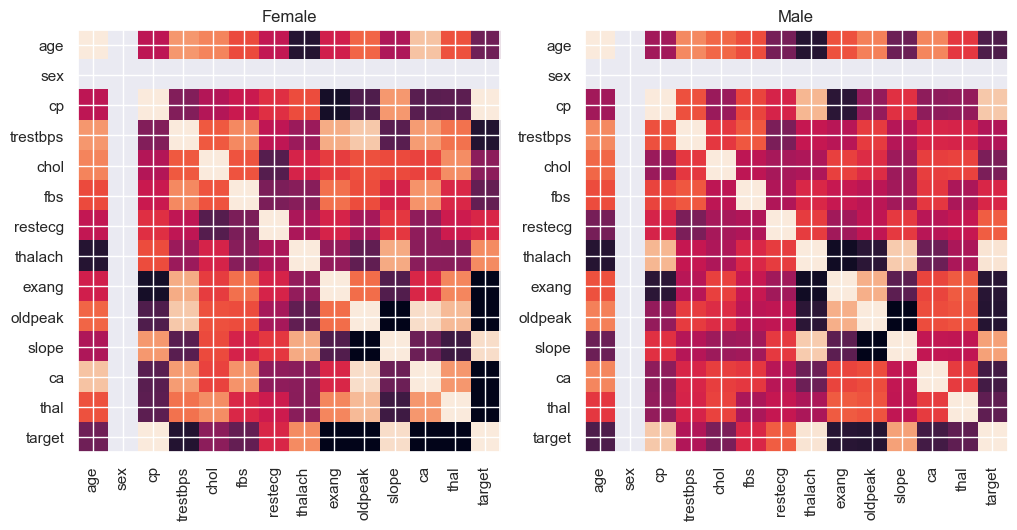

In [240]:
#pairwise correlation across all features per gender group
plt.figure(figsize=(12,20))
plt.subplot(121)
plt.imshow(np.corrcoef(df_female.T), vmin=-.5, vmax=.5)

plt.title('Female')
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.subplot(122)
plt.imshow(np.corrcoef(df_male.T), vmin=-.5, vmax=.5)

plt.title('Male')
plt.xticks(range(df.shape[1]),  df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.show()

In [241]:
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()

In [242]:
df_female = df_female.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [243]:
df_male = df_male.rename(columns = {'cp':'chest_pain',
                        'trestbps':'rest_blood_pressure',
                         'chol':'cholesterol',
                         'fbs':'fast_blood_sugar',
                         'restecg':'rest_ekg',
                         'thalach':'max_heart_rate',
                         'exang':'exercise_angina',
                         'ca':'vessels_colored',
                         'num':'outcome'}).copy()

In [244]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [245]:
# Run the same log reg clf (stratified 10fold) for each gender group:
var_cat = ['chest_pain','fast_blood_sugar','rest_ekg','exercise_angina','slope','vessels_colored','thal']
n_it = 10
kf = StratifiedKFold(n_splits=n_it)

In [246]:
print(var_cat)

['chest_pain', 'fast_blood_sugar', 'rest_ekg', 'exercise_angina', 'slope', 'vessels_colored', 'thal']


In [247]:
print(df_female.columns)

Index(['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol',
       'fast_blood_sugar', 'rest_ekg', 'max_heart_rate', 'exercise_angina',
       'oldpeak', 'slope', 'vessels_colored', 'thal', 'target'],
      dtype='object')


In [248]:
clf = LogisticRegression(penalty='l1', solver='liblinear',tol=1e-6, max_iter=int(1e6), warm_start=True,intercept_scaling=10000., multi_class='ovr')

X = pd.get_dummies(df_female, columns= var_cat)
y_female = X["target"]
y_female[y_female > 0] = 1
X = X.drop(columns=['sex', 'target', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []

(312, 25) Index(['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'oldpeak', 'chest_pain_0', 'chest_pain_1', 'chest_pain_2',
       'chest_pain_3', 'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1',
       'rest_ekg_2', 'exercise_angina_1', 'slope_0', 'slope_1', 'slope_2',
       'vessels_colored_0', 'vessels_colored_1', 'vessels_colored_2',
       'vessels_colored_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


C:\Users\Mahek\AppData\Local\Temp\ipykernel_39620\3375329139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_female[y_female > 0] = 1


In [249]:
for it, (train, test) in enumerate(kf.split(X, y_female)):
    print(y_female.iloc[train].shape)
    clf.fit(X.iloc[train], y_female.iloc[train])
    y_true = y_female.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    # print(y_pred.shape)
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it, tr.shape, te.shape, accs[it])
    # print(clf.classes_)
    # print("coeffs: ", clf.coef_.shape)
    coefs.append(clf.coef_.ravel())
print('Female: %f+/-%f' % (np.mean(accs), np.std(accs)))
coefs_f = np.asarray(coefs)
cols_f = X.columns

(280,)
(280,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
(281,)
Female: 0.932863+/-0.041378


In [250]:
coefs_f.shape

(10, 25)

In [251]:
X = pd.get_dummies(df_male, columns=var_cat)
y_male = X["target"]
y_male[y_male > 0] = 1
X = X.drop(columns=['sex','target', 'fast_blood_sugar_0','exercise_angina_0'])
print(X.shape,X.columns)
accs = np.zeros(n_it)
coefs = []
for it, (train, test) in enumerate(kf.split(X, y_male)):
    clf.fit(X.iloc[train], y_male.iloc[train])
    y_true = y_male.iloc[test]
    y_pred = clf.predict(X.iloc[test])
    accs[it] = accuracy_score(y_pred,y_true)
    # print(it,tr.shape,te.shape,accs[it])
    coefs.append(clf.coef_.ravel())
print('Male: %f+/-%f' % (np.mean(accs),np.std(accs)))
coefs_m = np.asarray(coefs)
cols_m = X.columns

C:\Users\Mahek\AppData\Local\Temp\ipykernel_39620\2288122484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_male[y_male > 0] = 1


(713, 26) Index(['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate',
       'oldpeak', 'chest_pain_0', 'chest_pain_1', 'chest_pain_2',
       'chest_pain_3', 'fast_blood_sugar_1', 'rest_ekg_0', 'rest_ekg_1',
       'rest_ekg_2', 'exercise_angina_1', 'slope_0', 'slope_1', 'slope_2',
       'vessels_colored_0', 'vessels_colored_1', 'vessels_colored_2',
       'vessels_colored_3', 'vessels_colored_4', 'thal_0', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')
Male: 0.827387+/-0.037123


In [252]:
coefs_m.shape

(10, 26)

In [44]:
y = df["target"]

In [303]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

# Assuming you've already loaded your dataset into 'df'
privileged_group = {'sex': 1}  # Define the privileged group based on your dataset
unprivileged_group = {'sex': 0}  # Define the unprivileged group based on your dataset
privileged_groups = [privileged_group]
unprivileged_groups = [unprivileged_group]

# reweighing = Reweighing(unprivileged_groups=[{"sex": 0}], privileged_groups=[{"sex": 1}])
# reweighing.fit(df)
# dataset_transformed = reweighing.transform(df)


In [304]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2022)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
train_bld = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df=pd.concat([X_train, y_train], axis=1), label_names=['target'], protected_attribute_names=['sex'])
test_bld = BinaryLabelDataset(favorable_label=1, unfavorable_label=0, df=pd.concat([X_test, y_test], axis=1), label_names=['target'], protected_attribute_names=['sex'])

# Train and apply reweighing algorithm to mitigate bias
rw = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
train_bld_reweighed = rw.fit_transform(train_bld)

In [306]:
# Train a new model on the reweighed dataset
reweighed_model = RandomForestClassifier(n_estimators=100, random_state=42)
reweighed_model.fit(train_bld_reweighed.features, train_bld_reweighed.labels.ravel())

RandomForestClassifier(random_state=42)

In [141]:
# # Evaluate the reweighed model
y_pred_reweighed = reweighed_model.predict(test_bld.features)
reweighed_accuracy = accuracy_score(test_bld.labels, y_pred_reweighed)
print(f"Reweighed Model Accuracy: {reweighed_accuracy}")

Reweighed Model Accuracy: 0.9620253164556962


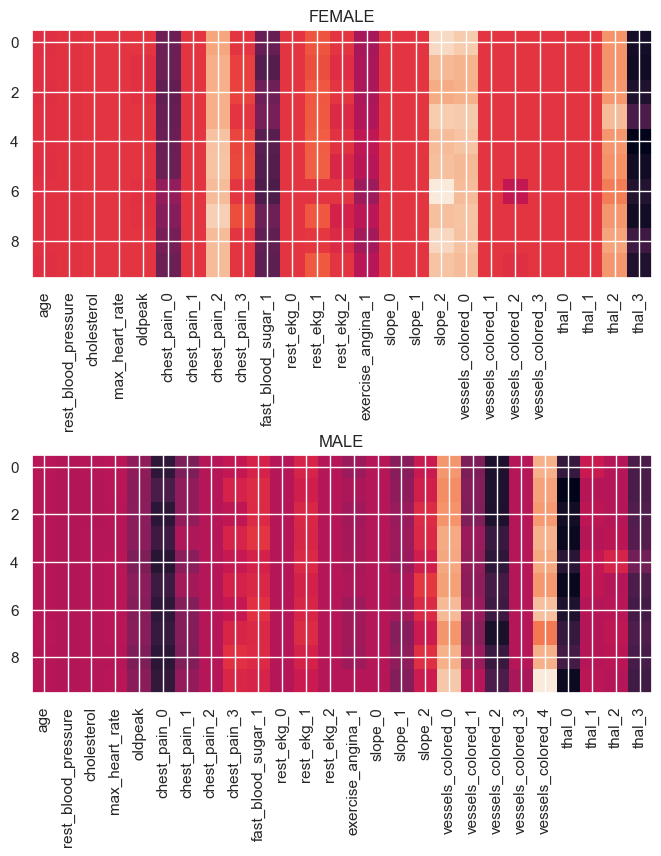

In [253]:
plt.figure(figsize=(8, 10))
plt.subplot(211)
plt.imshow(coefs_f)
plt.xticks(range(len(cols_f)), cols_f, rotation=90)
plt.title('FEMALE')

plt.subplot(212)
plt.imshow(coefs_m)
plt.title('MALE')
plt.xticks(range(len(cols_m)), cols_m, rotation=90)
plt.show()

In [254]:
from scipy import stats as spst
def visualize_by_gender(targ_feat):
    plt.figure(figsize=(12, 3))
    ax = plt.subplot(121)
    pd.crosstab(y_female, df_female[targ_feat]).plot(kind="bar", title=f'FEMALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent','Present'], rotation=0)

    ax = plt.subplot(122)
    pd.crosstab(y_male, df_male[targ_feat]).plot(kind="bar",title=f'MALE {targ_feat}', ax=ax)
    plt.xticks([0, 1], ['Absent', 'Present'], rotation=0)
    plt.show()

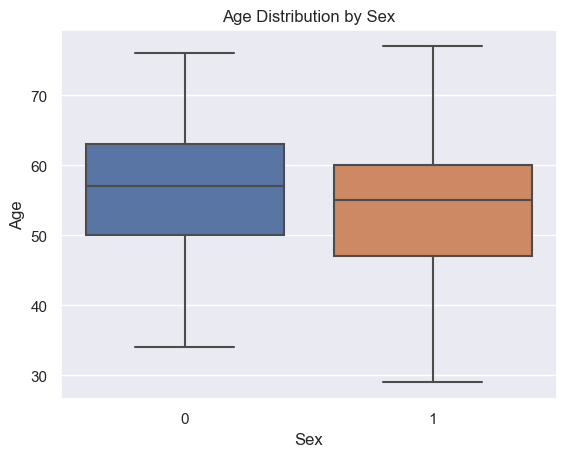

In [255]:
# Visualize feature distributions
sns.boxplot(x='sex', y='age', data=df)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age Distribution by Sex')
plt.show()

In [256]:
df_female["oldpeak"].unique()

array([1.9, 1. , 1.6, 3. , 0.7, 1.5, 1.1, 0.3, 0. , 3.4, 0.8, 1.2, 0.2,
       6.2, 3.6, 0.9, 0.5, 2.8, 0.6, 4. , 1.4, 0.4, 0.1, 1.3, 1.8, 2. ,
       2.6])

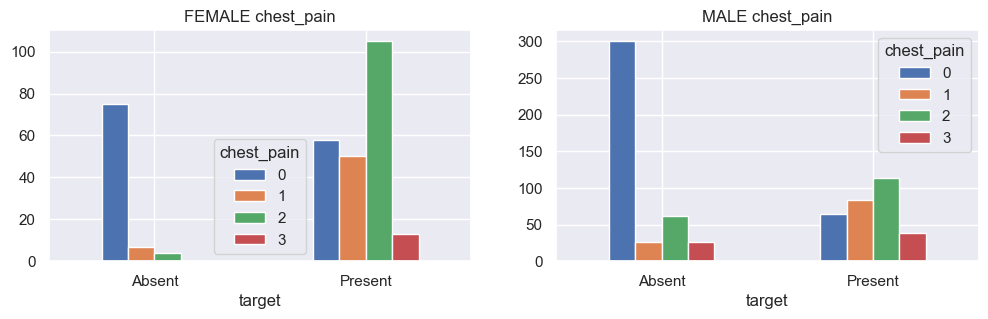

In [257]:
visualize_by_gender('chest_pain')

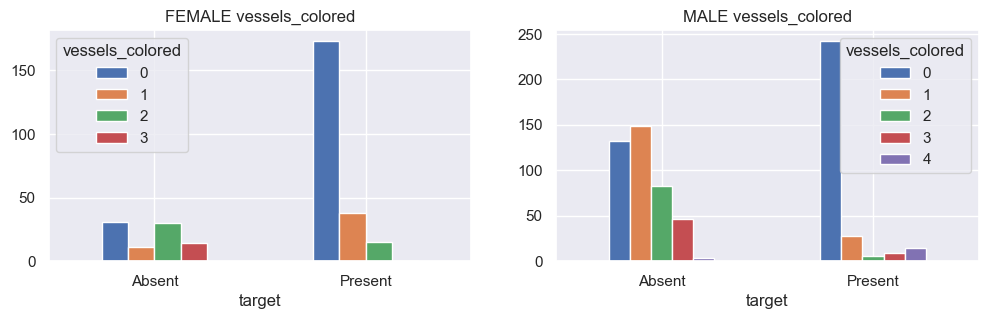

In [258]:
visualize_by_gender('vessels_colored')

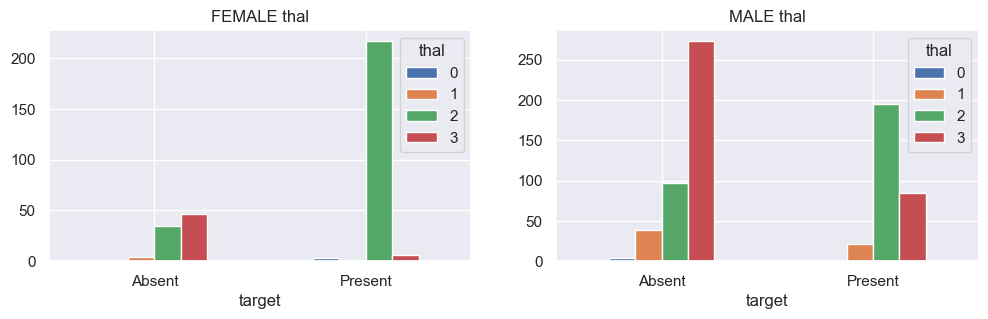

In [259]:
visualize_by_gender('thal')

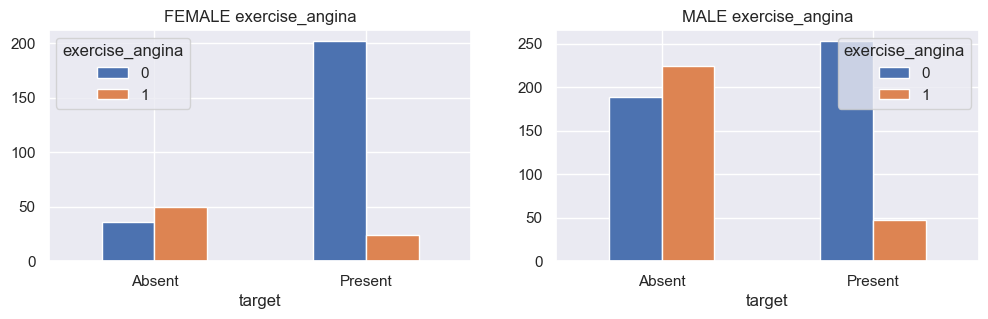

In [260]:
visualize_by_gender('exercise_angina')

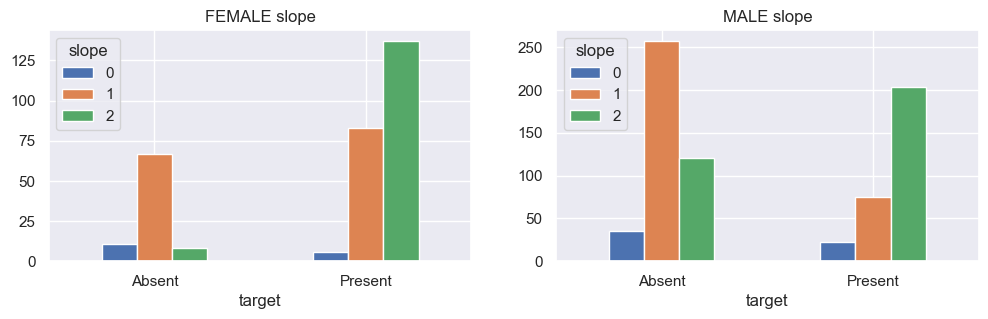

In [261]:
visualize_by_gender('slope')

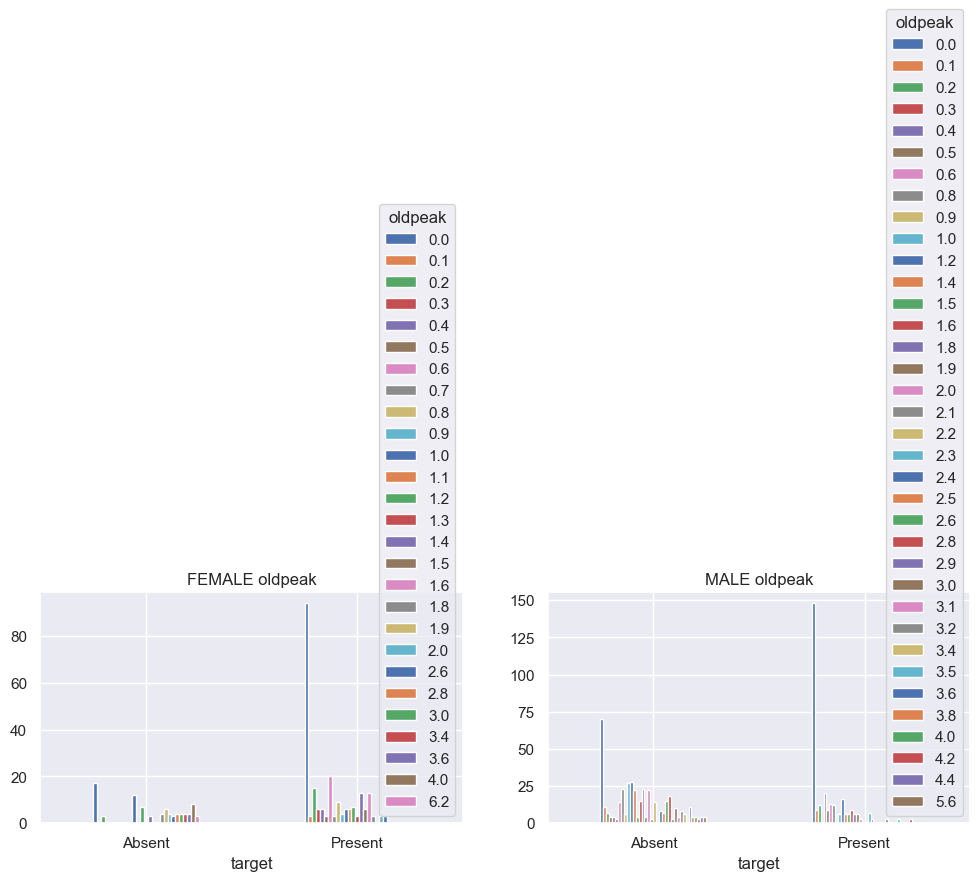

In [262]:
visualize_by_gender("oldpeak")

# ATTEMPT 1

In [263]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [264]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [265]:
# exploring the dataset

y = df["target"]
X = df.drop("target",axis=1)

print(sum(X.sex == 1)) # number of men in the dataset
print(sum(X.sex == 0)) # number of women in the dataset

y.unique()

713
312


array([0, 1], dtype=int64)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Mahek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [268]:
y_pred1 = log.predict(X_test)

In [269]:
accuracy_score(y_test,y_pred1)

0.7853658536585366



# ATTEMPT 2

In [270]:
filtered_df = df.drop(columns=['ca', 'thal'])
filtered_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,52,1,0,125,212,0,1,168,0,1.0,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,0


In [271]:
# Referencing https://colab.research.google.com/drive/16iFRPq0vx_CZypo4ZyJ_qTLrvds3FlDb?usp=sharing#scrollTo=89rqWut1SsCu
# for decision tree, lin regression, and one hot encoding
# github link https://github.com/smarthardik10/Heart-Disease-UCI-Diagnosis-Prediction/tree/master

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

# print(filtered_df.shape)
# print(df.shape)
X = filtered_df.iloc[:,0:11] # Features
y = filtered_df.iloc[:,11] # Target variable
# # X = heart_disease.data.features
# # y = heart_disease.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [272]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9707792207792207
Accuracy: 0.7857142857142857


In [273]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logre = LogisticRegression()
logre.fit(X_train,y_train)
y_pred = logre.predict(X_test)

C:\Users\Mahek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [274]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

*italicized text*# New Section

# ATTEMPT 3

In [275]:
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()

In [276]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [277]:
y = df["target"]
X = df.drop('target',axis=1)

In [278]:
y[y > 0] = 1

C:\Users\Mahek\AppData\Local\Temp\ipykernel_39620\435600133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 0] = 1


In [279]:
y.unique()

array([0, 1], dtype=int64)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [281]:
print(y_train.unique())
print(sum(y_train == 0))
print(sum(y_train == 1))

[1 0]
401
419


confusion matrix
[[ 77  21]
 [  7 100]]




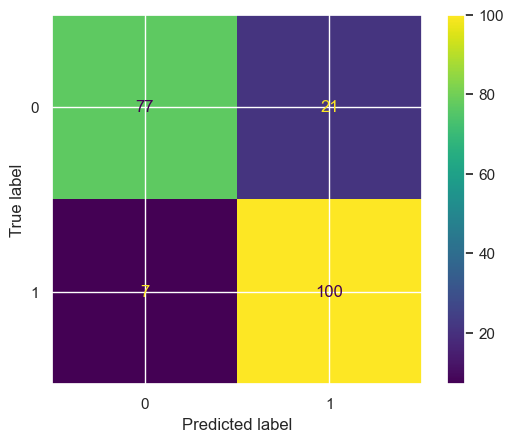

Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [282]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("confusion matrix")
print(lr_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[79 19]
 [11 96]]




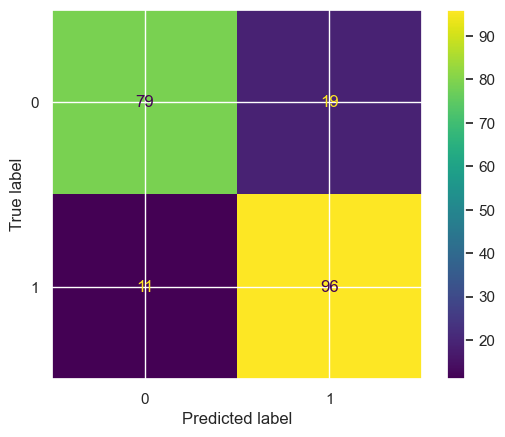

Accuracy of Naive Bayes model: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [283]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [284]:
X_test_men = X_test[X_test[:, 1] > 0]
y_test_men = y_test[X_test[:, 1] > 0]
X_test_women = X_test[X_test[:, 1] < 0]
y_test_women = y_test[X_test[:, 1] < 0]

nbpred_men = nb.predict(X_test_men)
nbpred_women = nb.predict(X_test_women)

nb_acc_score_men = accuracy_score(y_test_men, nbpred_men)
nb_acc_score_women = accuracy_score(y_test_women, nbpred_women)

print("Accuracy of Naive Bayes model for men:", nb_acc_score_men * 100,'\n')
print("Accuracy of Naive Bayes model for women:", nb_acc_score_women * 100,'\n')

Accuracy of Naive Bayes model for men: 82.35294117647058 

Accuracy of Naive Bayes model for women: 91.30434782608695 



In [285]:
imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

In [286]:
# Print the feature ranking
features = X.columns
features_ranked = []
importances_ranked = []
print("Feature ranking:")
for f in range(X_test.shape[1]):
   print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
   features_ranked.append(features[indices[f]])
   importances_ranked.append(importances[indices[f]])

Feature ranking:
1. oldpeak (0.039024)
2. cp (0.037073)
3. exang (0.037073)
4. thal (0.032195)
5. sex (0.024390)
6. ca (0.010732)
7. slope (0.002927)
8. chol (-0.001951)
9. trestbps (-0.003902)
10. restecg (-0.005854)
11. age (-0.005854)
12. fbs (-0.009756)
13. thalach (-0.010732)


In [287]:
importances

array([-0.00585366,  0.02439024,  0.03707317, -0.00390244, -0.00195122,
       -0.0097561 , -0.00585366, -0.01073171,  0.03707317,  0.03902439,
        0.00292683,  0.01073171,  0.03219512])

<Axes: >

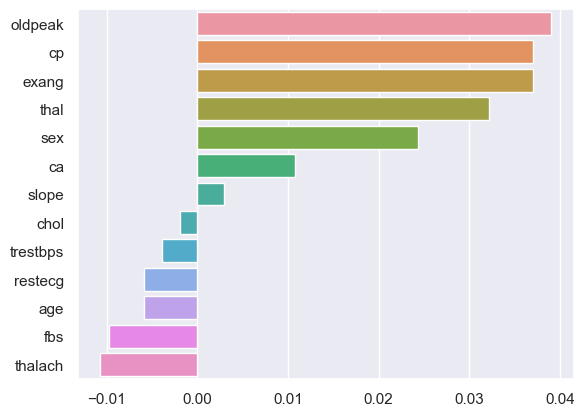

In [288]:
import seaborn as sns
# sns.barplot(data=importances)
sns.set()
sns.barplot(x=importances_ranked,y=features_ranked)

In [289]:
df_X_train = pd.DataFrame(X_train, columns=X.columns)
df_X_test = pd.DataFrame(X_test, columns=X.columns)

important_features = features_ranked[:7]
# important_features
df_X_train_new = df_X_train[important_features]
df_X_test_new = df_X_test[important_features]

X_train_new = df_X_train_new.to_numpy()
X_test_new = df_X_test_new.to_numpy()

In [290]:
sum(df_X_test["sex"] < 0)

69

confusion matrix
[[ 80  18]
 [  7 100]]




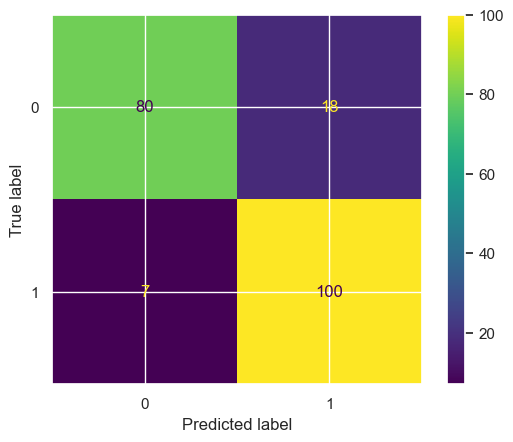

Accuracy of New Naive Bayes model: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.92      0.82      0.86        98
           1       0.85      0.93      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [291]:
m2_new = 'Naive Bayes w Top 7 Most Important Features'
nb_new = GaussianNB()
nb_new.fit(X_train_new, y_train)
nb_new_pred = nb_new.predict(X_test_new)
nb_new_conf_matrix = confusion_matrix(y_test, nb_new_pred)
nb_new_acc_score = accuracy_score(y_test, nb_new_pred)

print("confusion matrix")
print(nb_new_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_new_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of New Naive Bayes model:",nb_new_acc_score*100,'\n')
print(classification_report(y_test,nb_new_pred))

confusion matrix
[[ 98   0]
 [  0 107]]




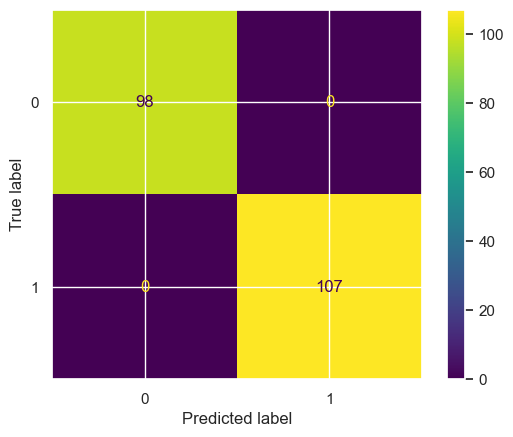

Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [292]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confusion matrix")
print(rf_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Random Forest:",rf_acc_score * 100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[ 91   7]
 [  3 104]]




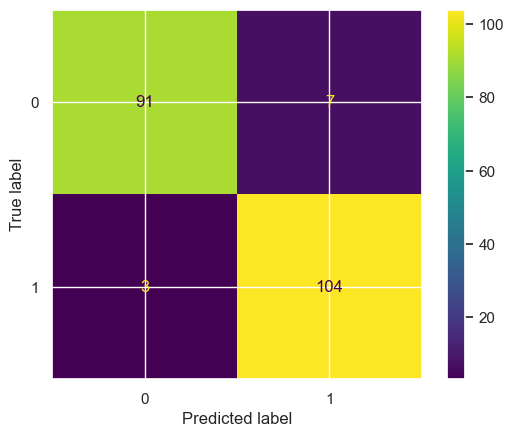

Accuracy of Extreme Gradient Boost: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        98
           1       0.94      0.97      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [293]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print("confusion matrix")
print(xgb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Extreme Gradient Boost:",xgb_acc_score * 100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[84 14]
 [11 96]]




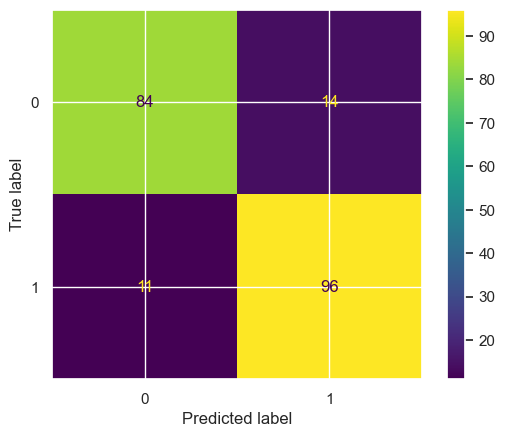

Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [294]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confusion matrix")
print(knn_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

# Normalization

In [295]:
# ## try w and w/o normalizing number of men & women
# df = df.rename(columns = {'cp':'chest_pain',
#                         'trestbps':'rest_blood_pressure',
#                          'chol':'cholesterol',
#                          'fbs':'fast_blood_sugar',
#                          'restecg':'rest_ekg',
#                          'thalach':'max_heart_rate',
#                          'exang':'exercise_angina',
#                          'ca':'vessels_colored',
#                          'num':'outcome'}).copy()


In [296]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [297]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [298]:
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [299]:
# idk try w/o scaling?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


confusion matrix
[[79 19]
 [11 96]]




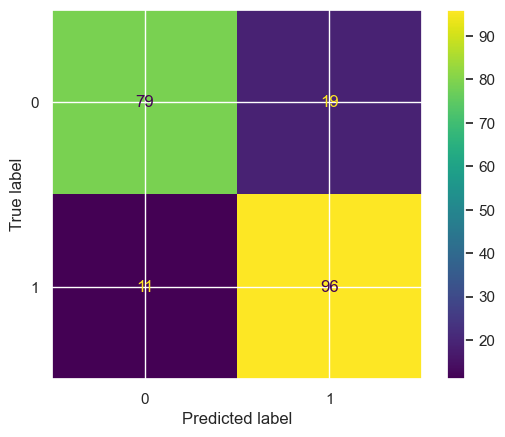

Accuracy of Naive Bayes model w/o Scaling: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [300]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [301]:
# try undersampling // currently giving same result as un-scaled, maybe the variables need to be renamed
import pandas as pd

# probably a better way than just rng ... but idk
male_indices = df[df.sex == 1].index
female_indices = df[df.sex == 0].index

print(len(male_indices))
print(len(female_indices))

random_male_indices = np.random.choice(male_indices, 79, replace=False)
random_male_sample = df.loc[random_male_indices]
print(random_male_sample.shape)

female_sample = df.loc[female_indices]
print(female_sample.shape)

df = pd.concat([female_sample, random_male_sample])
print(df.shape)

df.describe()

y = df["target"]
X = df.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


713
312
(79, 14)
(312, 14)
(391, 14)


confusion matrix
[[24  3]
 [ 2 50]]




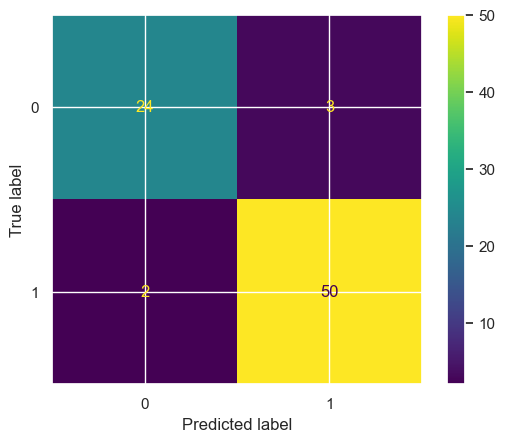

Accuracy of Naive Bayes model w/o Scaling: 93.67088607594937 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.94      0.96      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



In [302]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)

print("confusion matrix")
print(nb_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix)
disp.plot()
plt.show()

print("Accuracy of Naive Bayes model w/o Scaling:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2022)

In [308]:
rfc = RandomForestClassifier(n_estimators= 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

0.9620253164556962
[[21  3]
 [ 0 55]]
0.9482758620689655


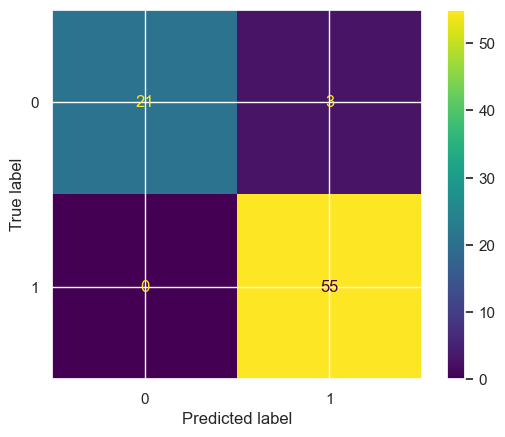

In [310]:
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

voting = VotingClassifier(estimators=[('gbdt', gbdt), ('abc', abc), ('dtc', dtc), ('knc', knc)],voting='soft')

voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

In [311]:
# Create transformers for scaling
numeric_transformer = ('scale', MinMaxScaler(), columns_to_scale)
#categorical_transformer = ('encode',LabelEncoder(),encoded_columns)

In [312]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[numeric_transformer],
    remainder='passthrough'
)


In [313]:
# Create the RandomForestClassifier
# random_forest_model = RandomForestClassifier(random_state=42)
# xgb = XGBClassifier(learning_rate=0.01, n_estimators=25)
voting = VotingClassifier(estimators=[('gbdt', gbdt), ('abc', abc), ('dtc', dtc), ('etc', etc)],voting='soft')

In [314]:

# Create the pipeline with SMOTE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb)
])

In [315]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
457,39,0,2,138,220,0,1,152,0,0.0,1,0,2
715,70,1,1,156,245,0,0,143,0,0.0,2,0,2
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2
797,65,0,0,150,225,0,0,114,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,54,0,2,135,304,1,1,170,0,0.0,2,0,2
408,46,0,0,138,243,0,0,152,1,0.0,1,0,2
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2
693,63,0,1,140,195,0,1,179,0,0.0,2,2,2


In [316]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['oldpeak', 'thalach', 'chol',
                                                   'trestbps', 'age'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               earl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=2, ...))])

In [317]:
# Evaluate the pipeline on the test set
accuracy = pipeline.score(X_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")
y_pred=pipeline.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
print("MEAN_ABSOLUTE_ERROR:",MAE)

Pipeline Accuracy: 1.00
MEAN_ABSOLUTE_ERROR: 0.0


In [202]:
file_path = "pipeline_1.pkl"

In [203]:
with open(file_path, "wb") as f:
    pickle.dump(pipeline,f)

In [204]:
joblib.dump(pipeline,file_path)

['pipeline_1.pkl']